In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler,\
RobustScaler, QuantileTransformer


# custom modules
import wrangle as w


## Q1) Load your zillow dataset.

In [2]:
df=w.wrangle_zillow()
df.head(2)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA


In [3]:
X_train, y_train, X_validate, y_validate, X_test, y_test=w.X_y_split(df,'property_value')


       train  ----> (1284141, 7)
    validate  ----> (428047, 7)
        test  ----> (428047, 7)

X_train -> (1284141, 6)
y_train -> (1284141,)

X_validate -> (428047, 6)
y_validate -> (428047,)

X_test -> (428047, 6)
y_validate -> (428047,)


In [4]:
X_train.head(2)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county
462820,5,4.0,3011,2005,7561.14,Ventura
3880,3,2.0,1682,1961,7086.19,LA


In [5]:
y_train.head(3)

462820    710674
3880      603333
992263     82804
Name: property_value, dtype: int64

In [6]:
# For only Question No. 9 
# y=y_train
# y

<div class='alert alert-block alert-success'>

## Q2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

<font color=purple>

Here is some sample code to get you started:

from sklearn.linear_model import LinearRegression

assuming X and y are already defined

model = LinearRegression().fit(X, y)

predictions = model.predict(X)
</font>

## Modify and add to the code above as necessary for it to work with the zillow dataset.
    
</div>

In [7]:
# convert y_train series into dataframe
y_train=pd.DataFrame(y_train)
y_train.head(2)

,property_value
462820,710674
3880,603333


In [8]:
X_train.head(2)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county
462820,5,4.0,3011,2005,7561.14,Ventura
3880,3,2.0,1682,1961,7086.19,LA


In [9]:
columns_to_scale=['area']
#create an object for scaling
scaler=MinMaxScaler()
#fit the object and transform into scaled column
X_train_scaled=scaler.fit_transform(X_train[columns_to_scale])


In [10]:
X_train_scaled[:2]

array([[0.0056673 ],
       [0.00316503]])

In [11]:
X_train_scaled=pd.DataFrame(X_train_scaled,index=X_train.index,columns=['area'])
X_train_scaled.head(2)

,area
462820,0.005667
3880,0.003165


In [12]:
X_train_scaled.shape

(1284141, 1)

<div class='alert alert-block alert-info'>

## build a model by linear regression algorithm & 'scaled area'
    
</div>

In [13]:
y_train['y_baseline'] = y_train['property_value'].mean()
y_train.head(3)


,property_value,y_baseline
462820,710674,460846.250536
3880,603333,460846.250536
992263,82804,460846.250536


In [14]:
# create & fit an object
model = LinearRegression().fit(X_train_scaled, y_train['property_value'])
# 
predictions = model.predict(X_train_scaled)
predictions

array([ 860173.7299305 ,  397791.25718944,  311159.778098  , ...,
        474681.04385293, 1090147.25474753,   97886.29744318])

In [15]:
y_train['y_hat']=predictions
y_train.head(2)

,property_value,y_baseline,y_hat
462820,710674,460846.250536,860173.729930
3880,603333,460846.250536,397791.257189


<div class='alert alert-block alert-info'>

## Plotting Actual vs. Predicted Values
    
</div>

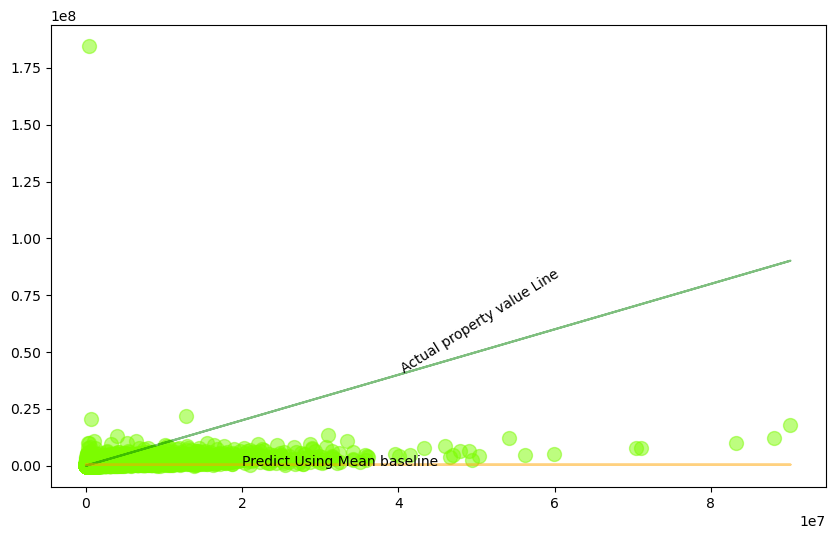

In [16]:
# visualization from y_validate

plt.figure(figsize=(10,6))

# actual line
plt.plot(y_train.property_value, y_train.property_value, alpha=.5, color="green", label='_nolegend_')
plt.annotate("Actual property value Line",(4*10**7,4.1*10**7),rotation=32)

#line predict by mean baseline model
plt.plot(y_train.property_value, y_train.y_baseline, alpha=.5, color="orange", label='_nolegend_')
plt.annotate("Predict Using Mean baseline",(2*10**7,0))

# scatter plot by linearRegression
plt.scatter(y_train.property_value, y_train.y_hat, 
            alpha=.5, color="lawngreen", s=100, label="Model:-- LinearRegression")
# plt.plot(y_train.property_value, y_train.y_hat, alpha=.5, color="red", label='_nolegend_')
# plt.annotate("Predict Using linear regression",(6*10**7,0.2))


<div class='alert alert-block alert-success'>

## Q3) Plot the residuals for the linear regression model that you made.
    
</div>

In [17]:
y_train.head(2)

,property_value,y_baseline,y_hat
462820,710674,460846.250536,860173.729930
3880,603333,460846.250536,397791.257189


In [18]:
y_train['residual_baseline'] = y_train['y_baseline'] - df['property_value']
y_train['residual'] = y_train['y_hat'] - y_train['property_value']

y_train.head(3)

,property_value,y_baseline,y_hat,residual_baseline,residual
462820,710674,460846.250536,860173.729930,-249827.749464,149499.729930
3880,603333,460846.250536,397791.257189,-142486.749464,-205541.742811
992263,82804,460846.250536,311159.778098,378042.250536,228355.778098


In [19]:
# only for alternate way
'''
# split the data

train, validate_and_test = train_test_split(df, train_size=.60, random_state=123)
validate, test = train_test_split(validate_and_test, test_size=.50, random_state=123)

train.shape, validate.shape, test.shape

Xtrain = train.drop(columns=['taxvalue','county'])
Xvalidate = train.drop(columns=['taxvalue','county'])
Xtest = test.drop(columns=['taxvalue','county'])
ytrain = train.taxvalue
yvalidate = validate.taxvalue
ytest = test.taxvalue

y = ytrain

X -> set of all ind features (just one here)
y -> dependent variable, target.
X = train[['sqft']]
y = train['taxvalue']

# make an object
lm = LinearRegression()
# fit an object
lm.fit(X, ytrain)
# use an object
yhat = lm.predict(X)

baseline_mean = ytrain.mean()
baseline_mean

mean_baseline = y.mean()
med_baseline = y.median()

another way (SAY  y_train=predictions_df)
predictions_df = pd.DataFrame(
                                {
                                   'y_act': y.values,
                                   'yhat': yhat,
                                   'mean_baseline' : mean_baseline,
                                   'med_baseline': med_baseline
                               }, index=train.index)


''';


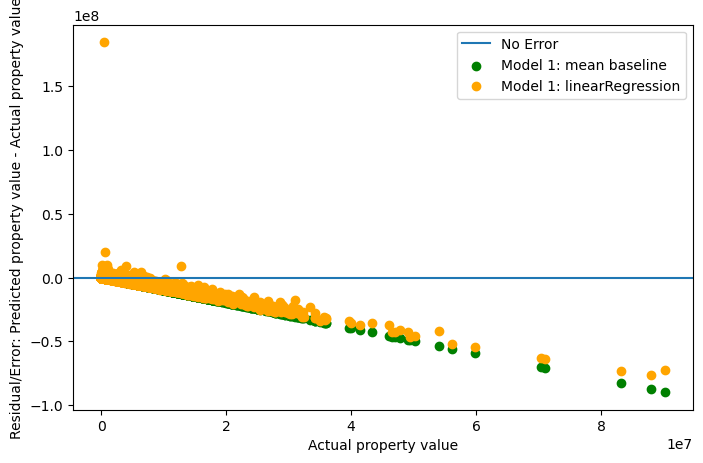

In [20]:
plt.figure(figsize=(8,5))

# for no error or residual
plt.axhline(label="No Error")

# for residual_baseline
plt.scatter(y_train.property_value,y_train.residual_baseline,
           color='green',label="Model 1: mean baseline")

# for linearRegression
plt.scatter(y_train.property_value,y_train.residual,
           color='orange',label="Model 1: linearRegression")


plt.legend()
plt.xlabel("Actual property value")
plt.ylabel("Residual/Error: Predicted property value - Actual property value")
plt.show();


<div class='alert alert-block alert-success'>

## Q4) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
    
## Q5) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).
</div>


In [21]:
y_train.head(3)

,property_value,y_baseline,y_hat,residual_baseline,residual
462820,710674,460846.250536,860173.729930,-249827.749464,149499.729930
3880,603333,460846.250536,397791.257189,-142486.749464,-205541.742811
992263,82804,460846.250536,311159.778098,378042.250536,228355.778098


In [22]:
# square each residual & residual_baseline value
y_train['residual_baseline^2'] = y_train.residual_baseline ** 2

y_train['residual^2'] = y_train.residual ** 2

y_train.head(3)


,property_value,y_baseline,y_hat,residual_baseline,residual,residual_baseline^2,residual^2
462820,710674,460846.250536,860173.729930,-249827.749464,149499.729930,6.241390e+10,2.235017e+10
3880,603333,460846.250536,397791.257189,-142486.749464,-205541.742811,2.030247e+10,4.224741e+10
992263,82804,460846.250536,311159.778098,378042.250536,228355.778098,1.429159e+11,5.214636e+10


In [23]:
# sum of squared errors (SSE)

SSE_baseline = sum(y_train['residual_baseline^2'])
SSE_lr = sum(y_train['residual^2'])  # predict - actual (or acutal - predict)

print("SSE_baseline = ", SSE_baseline)
print("SSE_lr = ", SSE_lr)

SSE_baseline =  6.079371293404695e+17
SSE_lr =  4.274689882631504e+17


In [24]:
# MSE (Mean squared error) 
# SSE= n ∗ MSE
MSE_baseline = SSE_baseline/len(y_train)
MSE_lr = SSE_lr/len(y_train)

print("MSE_baseline = ", MSE_baseline)
print("MSE_lr = ", MSE_lr)

MSE_baseline =  473419296900.0051
MSE_lr =  332883217857.8134


In [25]:
# explained sum of squares
ESS_lr = sum((y_train.y_hat - y_train.property_value.mean())**2) # predict - mean of actual 
# compute Total sum of squared
TSS_lr = SSE_lr + ESS_lr # actual - mean

print("ESS_lr = ", ESS_lr)
print("TSS_lr = ", TSS_lr)

ESS_lr =  1.804681410771352e+17
TSS_lr =  6.079371293402856e+17


In [26]:
from math import sqrt
# RMSE (Root Mean Squared Error)

RMSE_baseline = sqrt(MSE_baseline)
RMSE_lr = sqrt(MSE_lr)

print("RMSE baseline = ", RMSE_baseline)
print("RMSE_lr = ", RMSE_lr)

RMSE baseline =  688054.7194082787
RMSE_lr =  576960.3260691444


<div class='alert alert-block alert-success'>

## Q5) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.
</div>


In [27]:
print('Evaluation by manually using RMSE -root mean squared error')
print()
print('SSE(sum of squared errors)')
print("SSE_baseline = ", SSE_baseline)
print("SSE_lr = ", SSE_lr)
print()
print('MSE(mean squared errors)')
print("MSE_baseline = ", MSE_baseline)
print("MSE_lr = ", MSE_lr)
print()
print("ESS_lr = ", ESS_lr)
print("TSS_lr = ", TSS_lr)
print()
print('RMSE(root mean squared errors)')
print("RMSE_baseline = ", RMSE_baseline)
print("RMSE_lr = ", RMSE_lr)
print()

Evaluation by manually using RMSE -root mean squared error

SSE(sum of squared errors)
SSE_baseline =  6.079371293404695e+17
SSE_lr =  4.274689882631504e+17

MSE(mean squared errors)
MSE_baseline =  473419296900.0051
MSE_lr =  332883217857.8134

ESS_lr =  1.804681410771352e+17
TSS_lr =  6.079371293402856e+17

RMSE(root mean squared errors)
RMSE_baseline =  688054.7194082787
RMSE_lr =  576960.3260691444



<div class='alert alert-block alert-info'>

### Takeaway:
Since SSE_lr < SSE_baseline, so our linearRegression model doesn't perform better than the baseline model.
    
</div>

<div class='alert alert-block alert-success'>

## Q7) What is the amount of variance explained in your model?

</div>

In [28]:
MSE_lr > MSE_baseline

False

<div class='alert alert-block alert-success'>


## Q8) Is your model better than the baseline model?
</div>

In [29]:
RMSE_lr > RMSE_baseline

False

Since MSE_lr < MSE_baseline, so our linearRegression model is not better than baseline model.

<div class='alert alert-block alert-success'>

## Q9) Create a file named evaluate.py that contains the following functions.

* 9.1 plot_residuals(y, yhat): creates a residual plot

* 9.2 regression_errors(y, yhat): returns the following values:

    * sum of squared errors (SSE)

    * explained sum of squares (ESS)

    * total sum of squares (TSS)

    * mean squared error (MSE)

    * root mean squared error (RMSE)
    
* 9.3 baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

* 9.4 better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
</div>

> 9.1 plot_residuals(y, yhat): creates a residual plot

In [30]:
def plot_residuals(y, yhat):
    plt.figure(figsize=(8,6))
    plt.scatter(y, (y-yhat),marker='.')
    plt.axhline(0,ls=':', linewidth=1, color='r')
    plt.title('Residuals as Home Price Increases')
    plt.xlabel('Home Price In USD')
    plt.ylabel('Residual')
    plt.show()

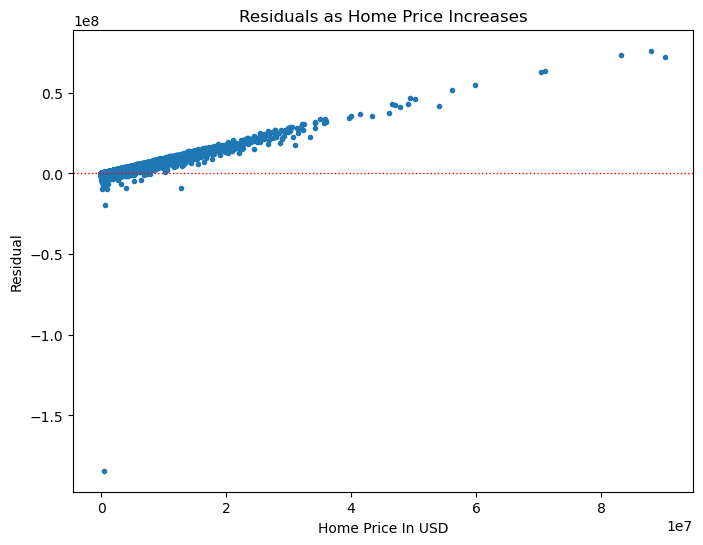

In [31]:
plot_residuals(y_train.property_value, y_train.y_hat)

> 9.2 regression_errors(y, yhat): returns the following values:

        i. sum of squared errors (SSE)

        ii. explained sum of squares (ESS)

        iii. total sum of squares (TSS)

        iv. mean squared error (MSE)

        v. root mean squared error (RMSE)

In [32]:
def regression_errors(y, yhat): # y=y_train series not dataframe and also yhat too
    
    preds = pd.DataFrame({
                            'y': y,
                            'yhat': yhat,
                            'mean': y.mean()
                        })

    # sum of squared errors (SSE)
    SSE=((preds['y']-preds['yhat'])**2).sum()
    #explained sum of squares (ESS)
    ESS=((preds['yhat']-preds['mean'])**2).sum()
    #total sum of squares (TSS)
    TSS=SSE+ESS
    #mean squared error (MSE)
    MSE=SSE/len(preds)
    #root mean squared error (RMSE)
    RMSE=(MSE)**0.5
    
    return SSE,ESS,TSS,MSE,RMSE

In [33]:
#for Question no. 9 
# for validation purpose only
# create & fit an object
# model = LinearRegression().fit(X_train_scaled, y)
# yhat = model.predict(X_train_scaled)
# yhat

In [34]:
# SSE,ESS,TSS,MSE,RMSE=regression_errors(y,yhat)
# SSE,ESS,TSS,MSE,RMSE

> 9.3 baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [35]:
y_train.head(2)

,property_value,y_baseline,y_hat,residual_baseline,residual,residual_baseline^2,residual^2
462820,710674,460846.250536,860173.729930,-249827.749464,149499.729930,6.241390e+10,2.235017e+10
3880,603333,460846.250536,397791.257189,-142486.749464,-205541.742811,2.030247e+10,4.224741e+10


In [36]:
# y is the series not a df, get after we split train, validate, & test
# y may be equal to y_train or y_validate or y_test ( it includes 'target' and excludes 'independent variables')

def baseline_mean_errors(y): 
    preds = pd.DataFrame({
                            'y': y,
                            'y_baseline': y.mean()
                        })
    preds['residual_baseline']=preds['y_baseline']-preds['y']

    preds['residual_baseline_sq'] =(preds['residual_baseline'])**2 # if we use ^2, syntax error
    ## SSE,MSE,& RMSE for baseline
    SSE_baseline=sum(preds['residual_baseline_sq'])
    MSE_baseline=SSE_baseline/len(preds)
    RMSE_baseline=(MSE_baseline)**0.5
    
    print('SSE_baseline=',SSE_baseline)
    print('MSE_baseline=',MSE_baseline)
    print('RMSE_baseline=',RMSE_baseline)

    return SSE_baseline,MSE_baseline,RMSE_baseline

    
    


In [37]:
# for validate
zil_df=w.wrangle_zillow()
zil_df.head(2)


,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA


In [38]:
X_train, y_train, X_validate, y_validate, X_test, y_test=w.X_y_split(zil_df,'property_value')


       train  ----> (1284141, 7)
    validate  ----> (428047, 7)
        test  ----> (428047, 7)

X_train -> (1284141, 6)
y_train -> (1284141,)

X_validate -> (428047, 6)
y_validate -> (428047,)

X_test -> (428047, 6)
y_validate -> (428047,)


In [39]:
SSE_baseline,MSE_baseline,RMSE_baseline=baseline_mean_errors(y_train)

SSE_baseline= 6.079371293404695e+17
MSE_baseline= 473419296900.0051
RMSE_baseline= 688054.7194082787


In [40]:
# this result took from previous code, 
# only for tally purpose
'''
SSE(sum of squared errors)
SSE_baseline =  6.079371293404695e+17
SSE_lr =  4.274689882631504e+17

MSE(mean squared errors)
MSE_baseline =  473419296900.0051
MSE_lr =  332883217857.8134

ESS_lr =  1.804681410771352e+17
TSS_lr =  6.079371293402856e+17

RMSE(root mean squared errors)
RMSE_baseline =  688054.7194082787
RMSE_lr =  576960.3260691444



''';


> 9.4 better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [41]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


In [42]:
def better_than_baseline(y, yhat):
    '''
    return a boolean for if the model beats the baseline prediction
    '''
    rmse_model = mean_squared_error(y, yhat, squared=False)
    sse, mse, rmse_baseline = baseline_mean_errors(y)
    print('rmse_model=',rmse_model)
    
    return (rmse_model < rmse_baseline)
    
    

In [43]:
X_train.head(2)

,bedrooms,bathrooms,area,yearbuilt,taxamount,county
462820,5,4.0,3011,2005,7561.14,Ventura
3880,3,2.0,1682,1961,7086.19,LA


In [44]:
y_train.head(2)

462820    710674
3880      603333
Name: property_value, dtype: int64

In [45]:
# create & fit linearRegression model
model = LinearRegression().fit(X_train[['area']],y_train)
y_hat=model.predict(X_train[['area']])
y_hat

array([ 860173.7299305 ,  397791.25718944,  311159.778098  , ...,
        474681.04385293, 1090147.25474753,   97886.29744318])

In [46]:
better_than_baseline(y_train, y_hat)

SSE_baseline= 6.079371293404695e+17
MSE_baseline= 473419296900.0051
RMSE_baseline= 688054.7194082787
rmse_model= 576960.3260691267


True